In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv(r'C:\Users\laksh\OneDrive\Desktop\Excel files\TERRORISM DATA.csv', encoding='latin1', low_memory=False)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [10]:
df.shape

(181691, 135)

In [11]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [13]:
pd.set_option('display.max_rows', 1000); 
df.nunique()

eventid                  576
iyear                     47
imonth                    13
iday                      32
approxdate              2244
extended                   2
resolution              1859
country                  205
country_txt              205
region                    12
region_txt                12
provstate               2855
city                   36673
latitude               48322
longitude              48039
specificity                5
vicinity                   3
location               44109
summary               112492
crit1                      2
crit2                      2
crit3                      2
doubtterr                  3
alternative                5
alternative_txt            5
multiple                   2
success                    2
suicide                    2
attacktype1                9
attacktype1_txt            9
attacktype2                9
attacktype2_txt            9
attacktype3                8
attacktype3_txt            8
targtype1     

In [15]:
df.isnull().any()

eventid               False
iyear                 False
imonth                False
iday                  False
approxdate             True
extended              False
resolution             True
country               False
country_txt           False
region                False
region_txt            False
provstate              True
city                   True
latitude               True
longitude              True
specificity            True
vicinity              False
location               True
summary                True
crit1                 False
crit2                 False
crit3                 False
doubtterr              True
alternative            True
alternative_txt        True
multiple               True
success               False
suicide               False
attacktype1           False
attacktype1_txt       False
attacktype2            True
attacktype2_txt        True
attacktype3            True
attacktype3_txt        True
targtype1             False
targtype1_txt       

In [16]:
pd.set_option('display.max_rows', 1000); 
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     435
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [26]:
df = df[['eventid', 'iyear','imonth','iday','nwound','nkill', 'country_txt', 'region_txt','provstate','city', 'latitude', 'longitude','gname', 'attacktype1_txt', 'target1', 'summary']]

In [37]:
df.describe()

,EventId,Year,Month,Day,Wound_count,Killed,Latitude,Longitude
count,1.816910e+05,181691.000000,181691.000000,181691.000000,165380.000000,171378.000000,177135.000000,1.771340e+05
mean,2.002704e+11,2002.638997,6.467277,15.505644,3.167668,2.403272,23.498343,-4.586957e+02
std,1.325955e+09,13.259430,3.388303,8.814045,35.949392,11.545741,18.569242,2.047790e+05
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,0.000000,11.510046,4.545640e+00
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,0.000000,31.467463,4.324651e+01
75%,2.014080e+11,2014.000000,9.000000,23.000000,2.000000,2.000000,34.685087,6.871033e+01
max,2.017120e+11,2017.000000,12.000000,31.000000,8191.000000,1570.000000,74.633553,1.793667e+02


In [24]:
df.isnull().sum()

eventid                0
iyear                  0
imonth                 0
iday                   0
nwound             16311
nkill              10313
country_txt            0
region_txt             0
provstate            421
city                 435
latitude            4556
longitude           4557
gname                  0
attacktype1_txt        0
target1              638
summary            66129
dtype: int64

In [34]:
df.rename(columns = {'eventid':'EventId','iyear':'Year','imonth':'Month','iday':'Day','nwound':'Wound_count','nkill':'Killed','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','gname':'Group_name','attacktype1_txt':'Attacktype','target1':'Target','summary':'Summary'},inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  float64
 1   iyear            181691 non-null  int64  
 2   imonth           181691 non-null  int64  
 3   iday             181691 non-null  int64  
 4   nwound           165380 non-null  float64
 5   nkill            171378 non-null  float64
 6   country_txt      181691 non-null  object 
 7   region_txt       181691 non-null  object 
 8   provstate        181270 non-null  object 
 9   city             181256 non-null  object 
 10  latitude         177135 non-null  float64
 11  longitude        177134 non-null  float64
 12  gname            181691 non-null  object 
 13  attacktype1_txt  181691 non-null  object 
 14  target1          181053 non-null  object 
 15  summary          115562 non-null  object 
dtypes: float64(5), int64(3), object(8)
mem

In [30]:
df.shape

(181691, 16)

In [36]:
df.isnull()

,EventId,Year,Month,Day,Wound_count,Killed,Country,Region,State,City,Latitude,Longitude,Group_name,Attacktype,Target,Summary
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
df.isnull().sum()

EventId            0
Year               0
Month              0
Day                0
Wound_count    16311
Killed         10313
Country            0
Region             0
State            421
City             435
Latitude        4556
Longitude       4557
Group_name         0
Attacktype         0
Target           638
Summary        66129
dtype: int64

In [38]:
df['Wound_count'].fillna(0,inplace=True)
df['Killed'].fillna(0,inplace=True)
df['State'].fillna(0,inplace=True)
df['City'].fillna(0,inplace=True)
df['Latitude'].fillna(0,inplace=True)
df['Longitude'].fillna(0,inplace=True)
df['Target'].fillna(0,inplace=True)
df['Summary'].fillna(0,inplace=True)
df['Group_name'].fillna(0,inplace=True)







In [39]:
df.isnull().sum()

EventId        0
Year           0
Month          0
Day            0
Wound_count    0
Killed         0
Country        0
Region         0
State          0
City           0
Latitude       0
Longitude      0
Group_name     0
Attacktype     0
Target         0
Summary        0
dtype: int64

In [45]:
df['Wound_count'].sum()

523869.0

In [43]:
df['Killed'].sum()

411868.0

In [46]:
df["Region"].value_counts()

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64

In [54]:
df.columns

Index(['EventId', 'Year', 'Month', 'Day', 'Wound_count', 'Killed', 'Country',
       'Region', 'State', 'City', 'Latitude', 'Longitude', 'Group_name',
       'Attacktype', 'Target', 'Summary'],
      dtype='object')

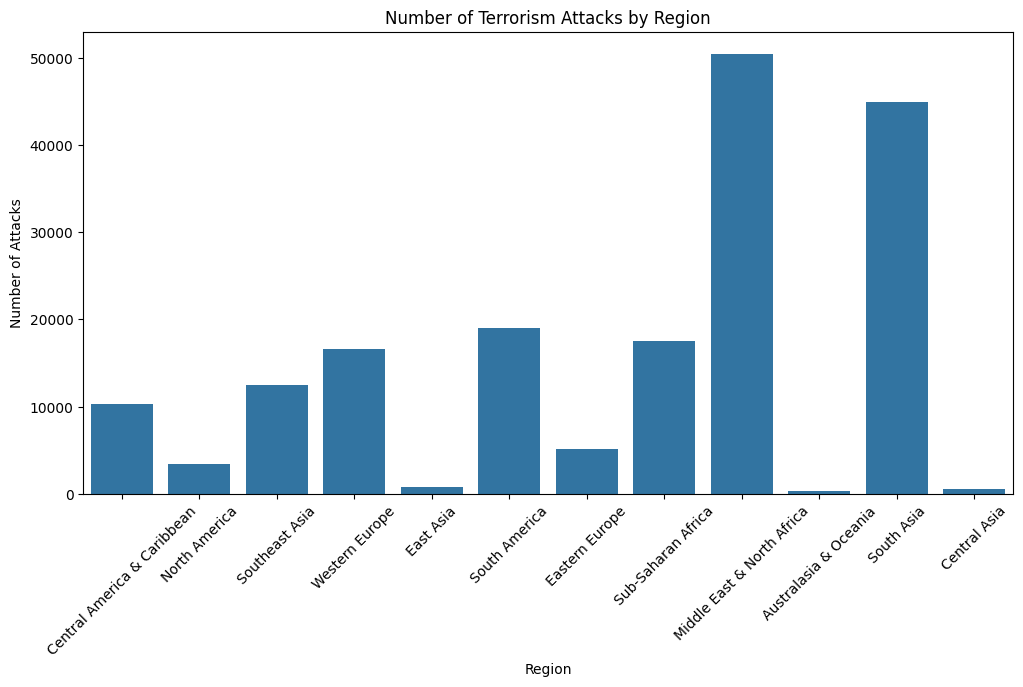

In [79]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=df)
plt.title('Number of Terrorism Attacks by Region')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()


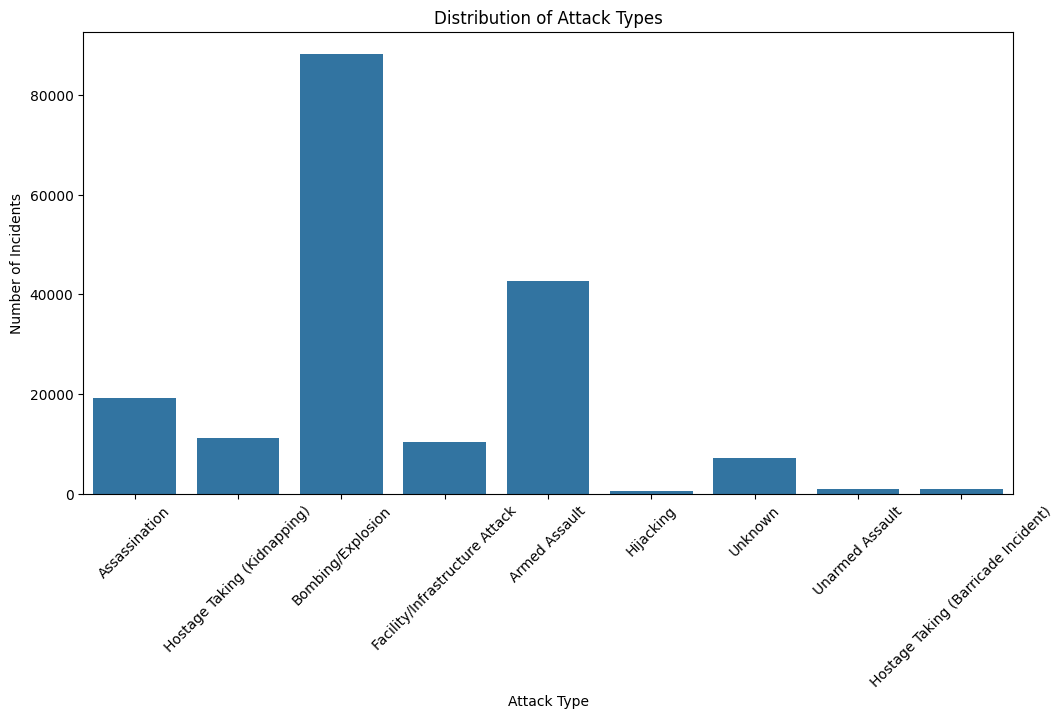

In [57]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Attacktype', data=df)
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


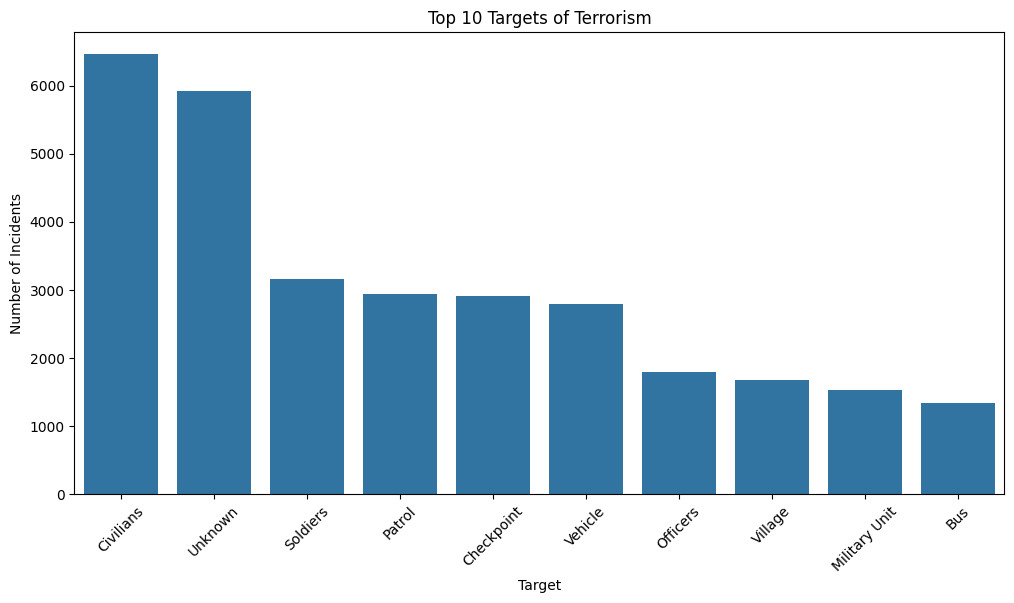

In [58]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Target', data=df, order=df['Target'].value_counts().index[:10])
plt.title('Top 10 Targets of Terrorism')
plt.xlabel('Target')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


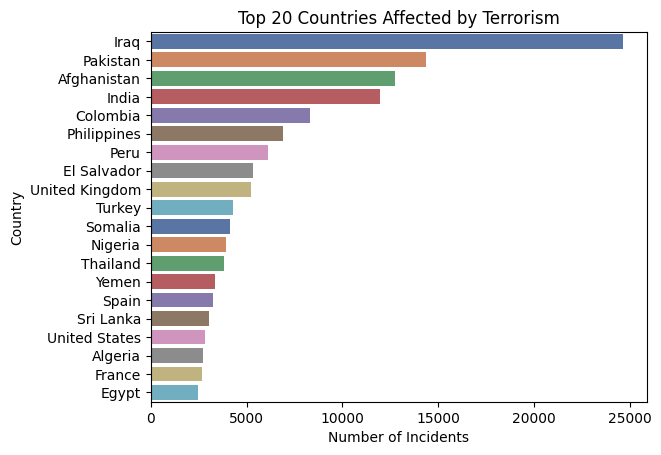

In [77]:
sns.barplot(x=df['Country'].value_counts()[:20].values, y=df['Country'].value_counts()[:20].index, hue=df['Country'].value_counts()[:20].index, palette='deep', legend=False)

plt.title('Top 20 Countries Affected by Terrorism')
plt.xlabel('Number of Incidents')
plt.ylabel('Country')
plt.show()

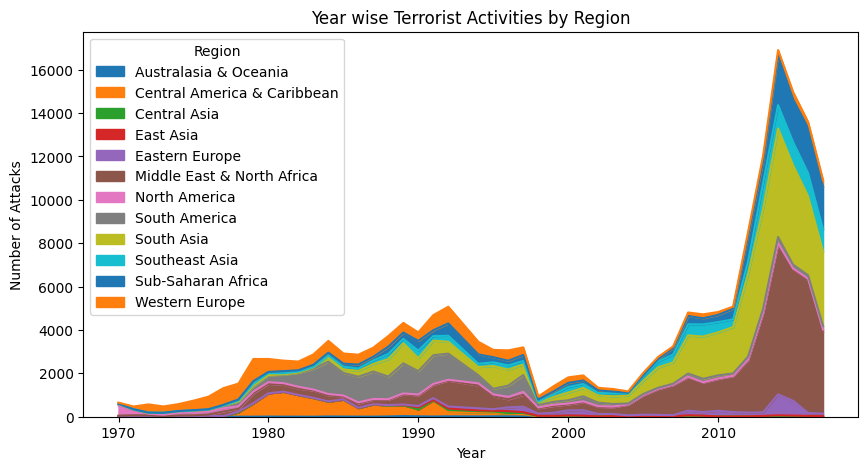

In [66]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(10,5))
plt.title('Year wise Terrorist Activities by Region')
plt.ylabel('Number of Attacks')
plt.show()

Text(0.5, 1.0, 'Year Wise Terrorist Activities')

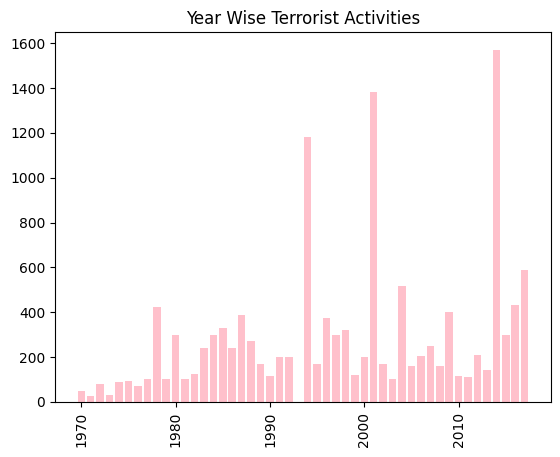

In [71]:
plt.bar(x='Year',height='Killed',data=df,color='pink')
plt.xticks(rotation=90)
plt.title('Year Wise Terrorist Activities')

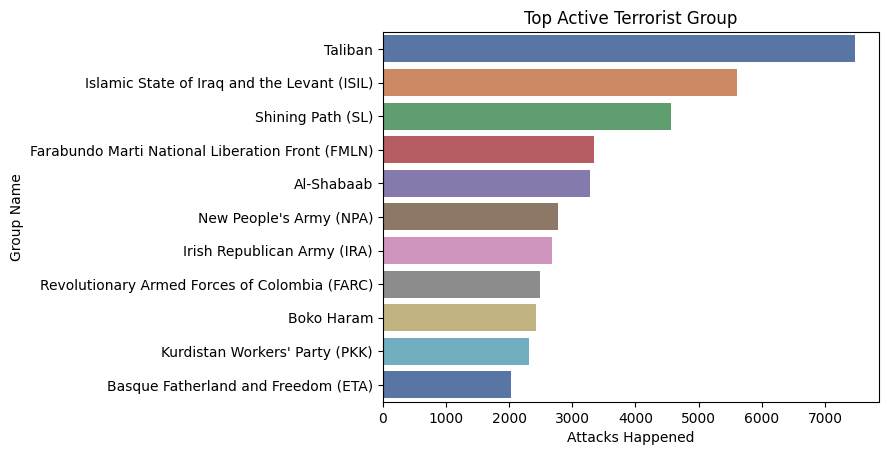

In [78]:
sns.barplot(y=df['Group_name'].value_counts()[1:12].index, x=df['Group_name'].value_counts()[1:12].values, hue=df['Group_name'].value_counts()[1:12].index, palette='deep', legend=False)

plt.title('Top Active Terrorist Group')
plt.xlabel('Attacks Happened')
plt.ylabel('Group Name')
plt.show()